<h1>Как тестировать<br/>
Machine Learning и Artificial Intelligence?</h1>

<br/>
<br/>

### Игорь Хрол, Минск

<div>
  <div style="float: left; width: 60%;">
      <h1>Кто перед вами?</h1>
      <ul>
    <li>Игорь Хрол</li>
<li>Team Lead / QA Engineer в отделе аналитики Toptal</li>
<li>\>10 лет в отрасли</li>
<li>Инженер, тимлид, менеджер, архитектор, тренер, консультант</li>
<li>Python, Scala, Ruby, Java, SQL и другое</li>
          <li><a>www.khroliz.com</a></li>
                </ul>
  </div>
  <div style="float: left; width: 40%;">
    ![avatar](images/avatar.jpg)
   </div>
</div>




# Где скачать?

[github.com/Khrol/TestML](https://github.com/Khrol/TestML)

  <div style="float: left; width: 50%;">
![QR code](images/repo_qr.jpg)      
  </div>
  <div style="float: left; width: 50%;">
![Star repo](images/star_video.gif)
    </div>

![joke](images/joke.jpg)

In [1]:
print('Hello, World!')

Hello, World!


<div style="float: left; width: 50%;">
<h1>План</h1>

<h2>I. Research</h2>

<h2>II. Development</h2>

<h2>III. Production</h2>
</div>
  <div style="float: left; width: 50%;">
![Plan](images/plan.png)
    </div>

# Что такое Machine Learning?

<div>
<div style="text-align: center;">
класс методов искусственного интеллекта, характерной чертой которых является не прямое решение задачи, а обучение в процессе применения решений множества сходных задач
</div>
<div style="height: 300px;">
<img src='images/wiki_logo.png' style="max-height: 100%;"/>
    </div>
<div>

![titanic](images/titanic.jpg)

# I. Research

![research](images/research.jpg)

# Что используем?

In [2]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

from sklearn import linear_model
from sklearn import preprocessing
from sklearn import metrics
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt

## Чтение данных

In [3]:
data = pd.read_csv('./data/passengers_info.csv')

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Создание baseline

![baseline](images/baseline.jpg)

## Создание baseline

In [7]:
features_dataframe = pd.DataFrame()

In [8]:
array, levels = pd.factorize(data.Sex)
features_dataframe['factorized_sex'] = array

In [9]:
levels

Index(['male', 'female'], dtype='object')

In [11]:
features_dataframe['known_age'] = data.Age.notnull().astype(int)
features_dataframe

,factorized_sex,known_age
0,0,1
1,1,1
2,1,1
3,1,1
4,0,1
5,0,0
6,0,1
7,0,1
8,1,1
9,1,1


## Обучающие и тестовые выборки

![train_test](images/train_test_data.jpg)

## Обучающие и тестовые выборки

In [19]:
X = features_dataframe
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [20]:
(len(X), len(X_train), len(X_test))

(891, 596, 295)

## Линейная регрессия

<br/>
  <div style="float: left; width: 50%;">
$$y = f(\vec{w}\cdot\vec{x}) = f\left(\sum_j w_j x_j\right)$$  </div>
  <div style="float: left; width: 50%;">
![perseptron](images/perceptron.png)
</div>



## Линейная регрессия

In [36]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
reg.coef_

array([ 0.48780652,  0.4163329 ,  0.15092339,  0.30573229,  0.1516997 ,
        0.03282223, -0.08468604, -0.43012605, -0.58398669, -0.12944032,
       -0.09875948, -0.21598195, -0.36861592,  0.00517839,  0.00485296,
       -0.08250647, -0.05783864, -0.12075028,  0.0427903 ])

# Оценка результата

In [22]:
y_predicted = reg.predict(X_test)

In [23]:
y_predicted

array([0.12500426, 0.12500426, 0.21166028, 0.68381376, 0.77046978,
       0.12500426, 0.77046978, 0.77046978, 0.21166028, 0.68381376,
       0.21166028, 0.77046978, 0.12500426, 0.77046978, 0.77046978,
       0.77046978, 0.21166028, 0.21166028, 0.21166028, 0.21166028,
       0.21166028, 0.77046978, 0.12500426, 0.12500426, 0.77046978,
       0.77046978, 0.21166028, 0.77046978, 0.77046978, 0.77046978,
       0.21166028, 0.77046978, 0.21166028, 0.12500426, 0.21166028,
       0.21166028, 0.21166028, 0.21166028, 0.21166028, 0.21166028,
       0.21166028, 0.21166028, 0.12500426, 0.21166028, 0.77046978,
       0.12500426, 0.12500426, 0.77046978, 0.21166028, 0.21166028,
       0.12500426, 0.21166028, 0.77046978, 0.21166028, 0.12500426,
       0.21166028, 0.21166028, 0.77046978, 0.21166028, 0.12500426,
       0.21166028, 0.77046978, 0.77046978, 0.12500426, 0.77046978,
       0.21166028, 0.77046978, 0.21166028, 0.77046978, 0.77046978,
       0.77046978, 0.21166028, 0.21166028, 0.12500426, 0.21166

# Оценка результата



  <div style="float: left; width: 60%;">
<h2>Кривая ошибок</h2>
<ol>
    <li>TP (True Positives)</li>
    <li>TN (True Negatives)</li>
    <li>FN (False Negatives)</li>
    <li>FP (False Positives)</li>
</ol>
    $$TPR = \frac{TP}{TP + FN}$$
    <br/>
    $$FPR = \frac{FP}{TN + FP}$$
</div>
  <div style="float: left; width: 40%;">
![roc](images/roc_curves.png)
</div>


# Оценка результата

In [24]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
roc_auc = metrics.auc(fpr, tpr)

def init_plt():
    plt.figure(figsize=(14,7))
    lw = 2
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    
roc_auc

0.7747747747747749

# Оценка результата

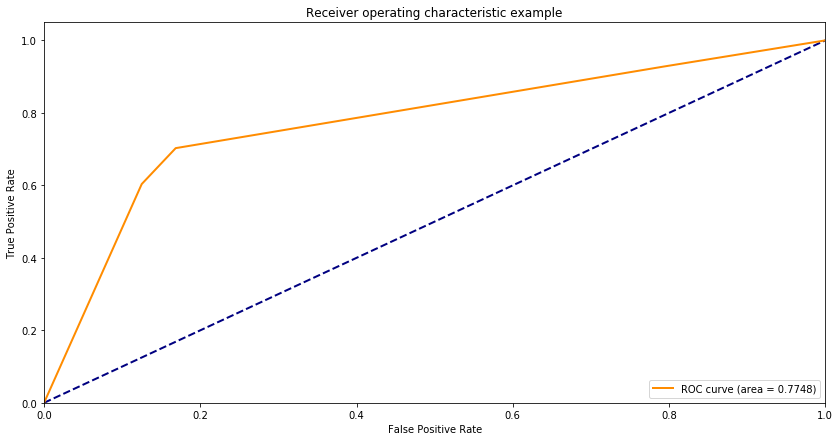

In [25]:
init_plt()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

# Feature engineering: scaling

In [26]:
min_max_scaler = preprocessing.MinMaxScaler()
features_dataframe['scaled_fare'] = min_max_scaler.fit_transform(data[['Fare']])

In [27]:
features_dataframe

,factorized_sex,known_age,scaled_fare
0,0,1,0.014151
1,1,1,0.139136
2,1,1,0.015469
3,1,1,0.103644
4,0,1,0.015713
5,0,0,0.016510
6,0,1,0.101229
7,0,1,0.041136
8,1,1,0.021731
9,1,1,0.058694


# Feature engineering: категориальные признаки

In [28]:
for cl_num in [1, 2]:
    name = 'class{}'.format(cl_num)
    features_dataframe[name] = (data['Pclass'] == cl_num).astype(int)

for sp in [1, 2, 3, 4]:
    name = 'sib_sp_{}'.format(sp)
    features_dataframe[name] = (data.SibSp == sp).astype(int)
    
for emb in ['C', 'Q', 'S']:
    name = 'embarked{}'.format(emb)
    features_dataframe[name] = (data.Embarked == emb).astype(int) 
    
for age in [10, 20, 30, 40, 50, 60, 70]:
    name = 'more_{}_years'.format(age)
    features_dataframe[name] = (data['Age'] >= age).astype(int)

In [29]:
features_dataframe

,factorized_sex,known_age,scaled_fare,class1,class2,sib_sp_1,sib_sp_2,sib_sp_3,sib_sp_4,embarkedC,embarkedQ,embarkedS,more_10_years,more_20_years,more_30_years,more_40_years,more_50_years,more_60_years,more_70_years
0,0,1,0.014151,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0
1,1,1,0.139136,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0
2,1,1,0.015469,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
3,1,1,0.103644,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0
4,0,1,0.015713,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0
5,0,0,0.016510,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,0,1,0.101229,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0
7,0,1,0.041136,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
8,1,1,0.021731,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
9,1,1,0.058694,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0


# Повторяем на большем числе признаков

In [30]:
X = features_dataframe
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [31]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_predicted = reg.predict(X_test)

In [33]:
fpr_full, tpr_full, _ = metrics.roc_curve(y_test, y_predicted)
roc_auc_full = metrics.auc(fpr_full, tpr_full)
roc_auc_full

0.8453290246768508

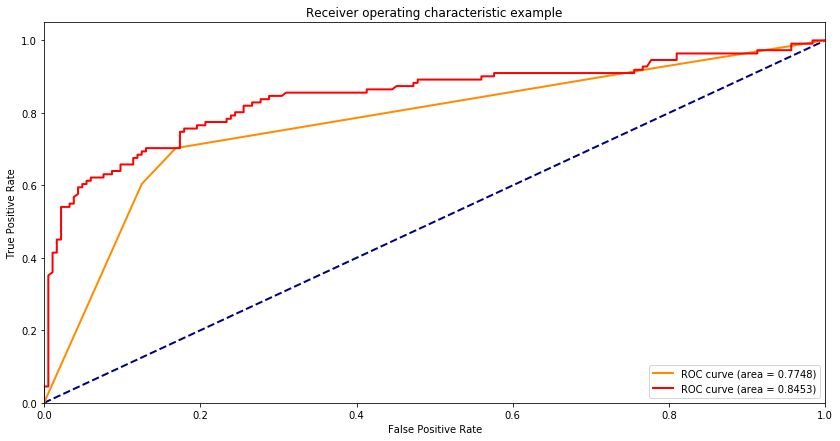

In [34]:
init_plt()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot(fpr_full, tpr_full, color='red', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_full)
plt.legend(loc="lower right")
plt.show()

# Больше не значит лучше

In [35]:
sorted_features = list(sorted(zip(features_dataframe.columns, reg.coef_),
                              key=lambda x: -abs(x[1])))
sorted_features

[('sib_sp_4', -0.5839866903642109),
 ('factorized_sex', 0.4878065218356281),
 ('sib_sp_3', -0.43012605010101934),
 ('known_age', 0.4163329006803484),
 ('more_10_years', -0.36861592370314944),
 ('class1', 0.30573229445465583),
 ('embarkedS', -0.21598195010151952),
 ('class2', 0.15169969725676358),
 ('scaled_fare', 0.1509233932306982),
 ('embarkedC', -0.12944031947896611),
 ('more_60_years', -0.12075027705369325),
 ('embarkedQ', -0.09875948287971013),
 ('sib_sp_2', -0.08468604202023416),
 ('more_40_years', -0.08250647102947699),
 ('more_50_years', -0.057838642959210165),
 ('more_70_years', 0.04279030131631274),
 ('sib_sp_1', 0.03282222545379855),
 ('more_20_years', 0.005178388443575668),
 ('more_30_years', 0.0048529582883881095)]

# Пересматриваем модель на 8-ми признаках

In [37]:
features_part = list(map(lambda x: x[0], sorted_features[:8]))
features_part

['sib_sp_4',
 'factorized_sex',
 'sib_sp_3',
 'known_age',
 'more_10_years',
 'class1',
 'embarkedS',
 'class2']

In [38]:
X = features_dataframe[features_part]
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [39]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

reg.coef_

array([-0.57285094,  0.50363661, -0.41594734,  0.40159077, -0.37529241,
        0.29374776, -0.09615099,  0.14606983])

# Пересматриваем модель на 8-ми признаках

In [40]:
y_predicted = reg.predict(X_test)

In [41]:
fpr_part, tpr_part, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc_part = metrics.auc(fpr_part, tpr_part)
roc_auc_part

0.8513268703486094

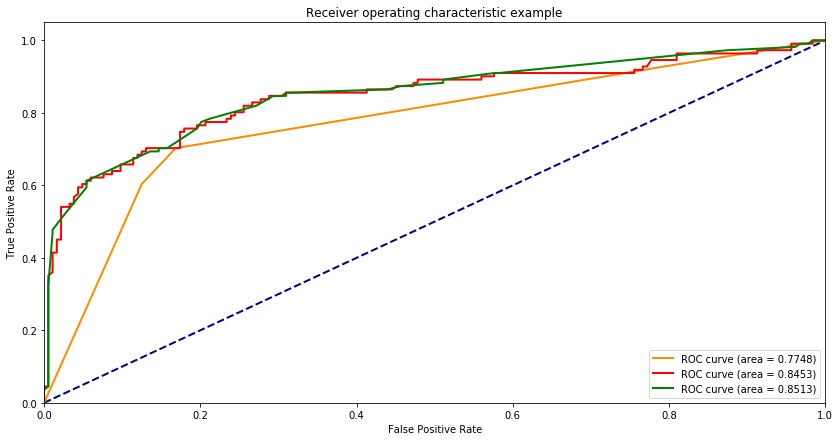

In [42]:
init_plt()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot(fpr_full, tpr_full, color='red', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_full)
plt.plot(fpr_part, tpr_part, color='green', lw=2, label='ROC curve (area = %0.4f)' % roc_auc_part)
plt.legend(loc="lower right")
plt.show()

# Выбор threshold

In [43]:
fpr_part, tpr_part, thresholds

(array([0.        , 0.00543478, 0.00543478, 0.00543478, 0.00543478,
        0.00543478, 0.01086957, 0.01086957, 0.02717391, 0.05434783,
        0.05434783, 0.13586957, 0.14673913, 0.14673913, 0.1576087 ,
        0.19565217, 0.20108696, 0.21195652, 0.27173913, 0.29347826,
        0.30978261, 0.30978261, 0.31521739, 0.44021739, 0.45652174,
        0.51086957, 0.51086957, 0.57608696, 0.58152174, 0.875     ,
        0.96195652, 0.9673913 , 0.97826087, 0.98369565, 0.98913043,
        1.        ]),
 array([0.03603604, 0.04504505, 0.18018018, 0.21621622, 0.31531532,
        0.32432432, 0.46846847, 0.47747748, 0.52252252, 0.59459459,
        0.61261261, 0.69369369, 0.69369369, 0.7027027 , 0.7027027 ,
        0.75675676, 0.77477477, 0.78378378, 0.81981982, 0.84684685,
        0.84684685, 0.85585586, 0.85585586, 0.86486486, 0.87387387,
        0.88288288, 0.89189189, 0.90990991, 0.90990991, 0.97297297,
        0.98198198, 0.99099099, 0.99099099, 1.        , 1.        ,
        1.        ]),
 arr

# Выбор threshold

In [44]:
for i in range(1, len(fpr_part)):
    if fpr_part[i - 1] < 1 - tpr_part[i - 1] and fpr_part[i] > 1 - tpr_part[i]:
        print(thresholds[i - 1], thresholds[i])
        break

0.4427044160517497 0.37285178703943583


# II. Development

![development](images/development.jpg)

# Сохраняем модель

In [45]:
joblib.dump(reg, 'model.pkl')

['model.pkl']

![demo](images/demo.png)

# Сравниваем с Research

In [46]:
import requests
import json

all_predicted_y = reg.predict(X)
EPS = 0.000001

def test_record(record):
    id = record['PassengerId']
    actual_result = requests.post('http://localhost:5000/classify',
                    headers={'Content-Type': 'application/json'}, 
                    data=json.dumps({'sex': record['Sex'], 'sib_sp': record['SibSp'], 'age': record['Age'],
                                   'ticket_class': record['Pclass'], 'embarked': record['Embarked']}))
    actual_score = json.loads(actual_result.content.decode('UTF-8'))['score']
    expected_score = all_predicted_y[id - 1]
    print(record['PassengerId'], expected_score, actual_score)
    assert abs(expected_score - actual_score) < EPS

data.sample(10).apply(test_record, axis=1)

ConnectionError: (MaxRetryError("HTTPConnectionPool(host='localhost', port=5000): Max retries exceeded with url: /classify (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x10cd939e8>: Failed to establish a new connection: [Errno 61] Connection refused',))",), 'occurred at index 192')

# III. Production

![production](images/production.jpg)

<div style="float: left; width: 60%;">
<h1>Воспроизводимость<br/> логов</h1>

</div>
  <div style="float: left; width: 40%; height: 600px;">
  <img src='images/repeat_logs.jpg' style="max-height: 100%;"/>
    </div>

# Устаревание модели

![ships](images/ships.png)

# Другие материалы

- [https://www.youtube.com/watch?v=T_YWBGApUgs&t=21524s](https://www.youtube.com/watch?v=T_YWBGApUgs&t=21524s)
- [https://www.eecs.tufts.edu/~dsculley/papers/ml_test_score.pdf](https://www.eecs.tufts.edu/~dsculley/papers/ml_test_score.pdf)
- ссылка на kaggle
- ссылка на ODS Slack

<div style="float: left; width: 70%;">
<h1>Спасибо за внимание!<br/>Вопросы?<br/></h1>
<h2>Игорь Хрол</h2>
<h2>[khroliz@gmail.com](khroliz@gmail.com)</h2>
<h2>[github.com/Khrol/TestML](https://github.com/Khrol/TestML)</h2>

</div>
  <div style="float: left; width: 30%; height: 600px;">
  <img src='images/question.png' style="max-height: 100%;"/>
    </div>